### Projeto de C318 sobre análise do gasto de combustível em carros
Nome: Pedro Piccichelli Carvalho

Curso: Engenharia da Computação

Matrícula: 1607

Dataset utilizado: autompg-dataset -> https://www.kaggle.com/datasets/uciml/autompg-dataset

### Perguntas de negócio: 
- Qual o melhor carro para comprar pensando em economia?
- O que mais afeta em um carro em questão de economia?

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
%matplotlib inline
# Input data files are available in the "../input/" directory on kaggle.

df = pd.read_csv('auto-mpg.csv')
df.shape

(398, 9)

### No dataset escolhido existem 9 colunas com 398 linhas cada.

In [227]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

### As 9 colunas são:

|Nome|Descrição|
|----|---------|
|mpg|Milhas por galão|
|cylinders|Quantidade de cilindros no motor|
|displacement|Cilindradas do carro|
|horsepower|Potência do Motor|
|weight|Peso do carro|
|acceleration|Aceleração do carro|
|model year|Ano do modelo|
|origin|Origem do carro|
|car name|Nome do carro|

### Aqui, por exemplo, mostra as primeiras linhas desse dataset

In [228]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Verificando se os dados estão OK

In [229]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [230]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Corrigir o horsepower para deixar como um número

In [37]:
df['horsepower'].unique()
# é observado que possui um ? no meio

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [231]:
df = df[df['horsepower'] != '?']
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [232]:
df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [235]:
df.duplicated().unique()
# Como o unique só retornou false, quer dizer que esse DF não possúi dados repetidos

array([False])

In [236]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Agora vamos focar no nosso objetivo, que é saber quantos kilometros por litro um carro faria.

In [237]:
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

C:\Users\Pedro Piccichelli\AppData\Local\Temp\ipykernel_17252\463727065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

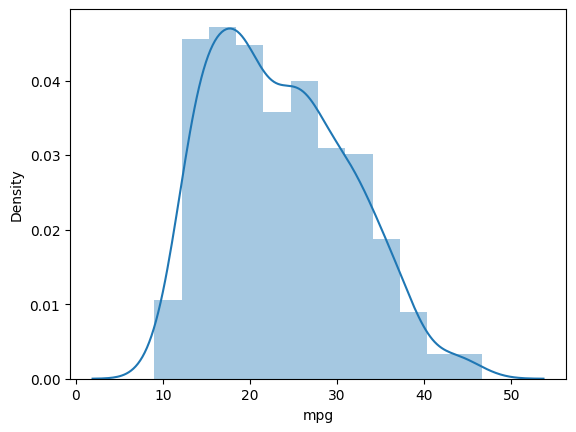

In [238]:
sns.distplot(df['mpg'])

### Agora vamos visualizar a relação entre esses valores, mas para isso é necessário normalizar os valores

Normalizar é necessário para fazer uma comparação justa, em que os valores estarão na mesma escala, nesse caso de 0 a 1.

In [239]:
def normalizar(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

df_scale = df.copy()

df_scale ['displacement'] = normalizar(df_scale['displacement'])
df_scale['horsepower'] = normalizar(df_scale['horsepower'])
df_scale ['acceleration'] = normalizar(df_scale['acceleration'])
df_scale ['weight'] = normalizar(df_scale['weight'])
df_scale['mpg'] = normalizar(df_scale['mpg'])

df['Country_code'] = df.origin.replace([1,2,3],['USA','Europe','Japan'])
df_scale['Country_code'] = df.origin.replace([1,2,3],['USA','Europe','Japan'])

df_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu,USA
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320,USA
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite,USA
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst,USA
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino,USA


### Vamos visualizar qual a relação entre o gasto de combustível e o país de origem.

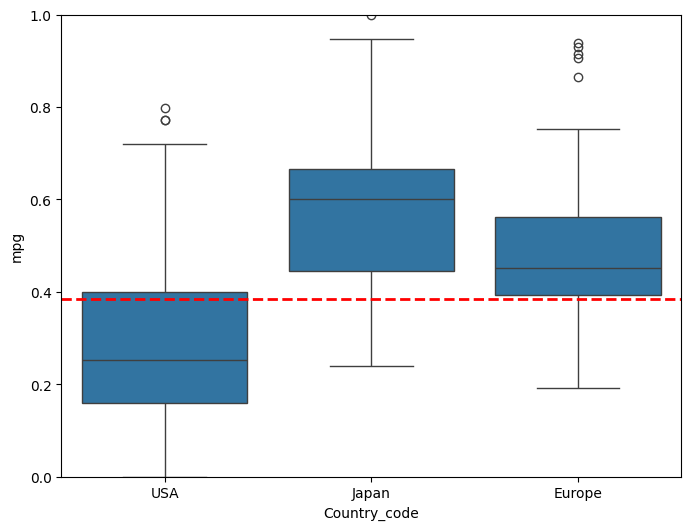

In [240]:
var = 'Country_code'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

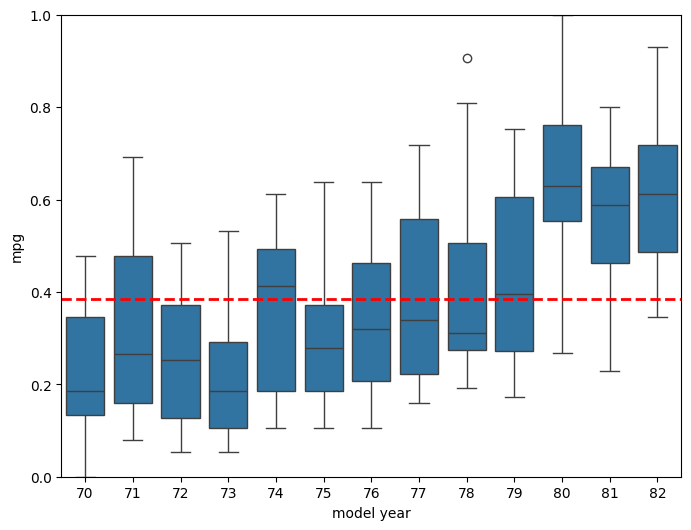

In [241]:
var = 'model year'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

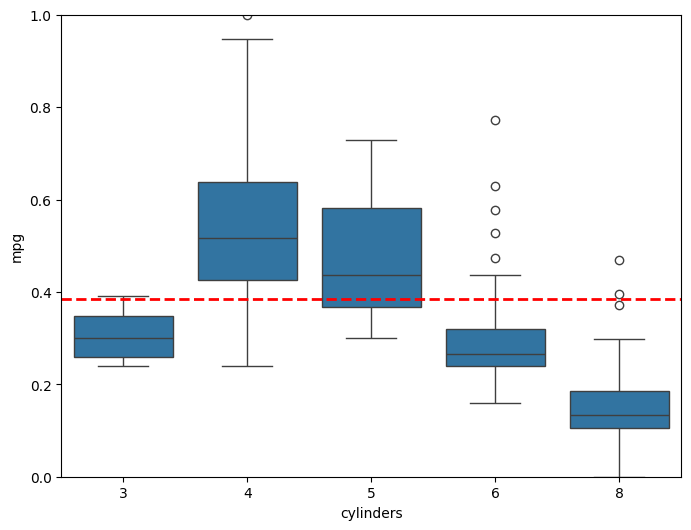

In [51]:
var = 'cylinders'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Já visualizamos a correlação de algumas variávies com o gasto de combustível, agora vamos verificar através de umm matriz de correlação as relações entre todas as variáveis numéricas

<Axes: >

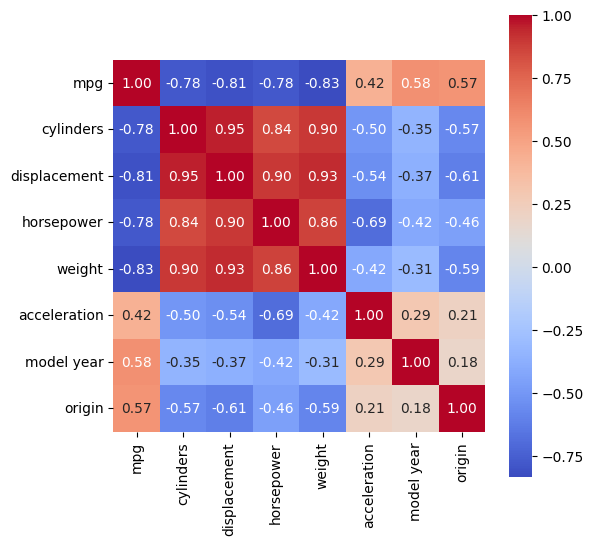

In [52]:
numeric_columns = df.select_dtypes(include='number')
corrmat = numeric_columns.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='coolwarm', square=True)

### Vamos analisar também a função de regressão linear sobre algumas variáveis de acordo com cada país

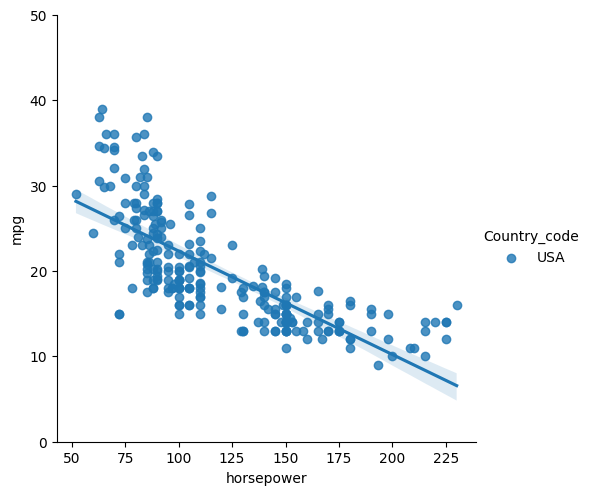

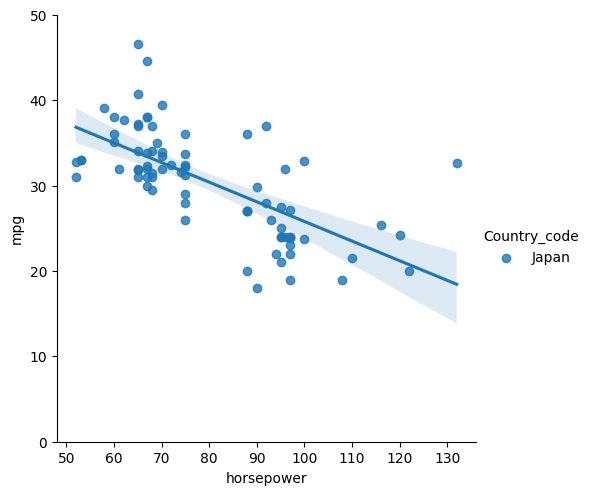

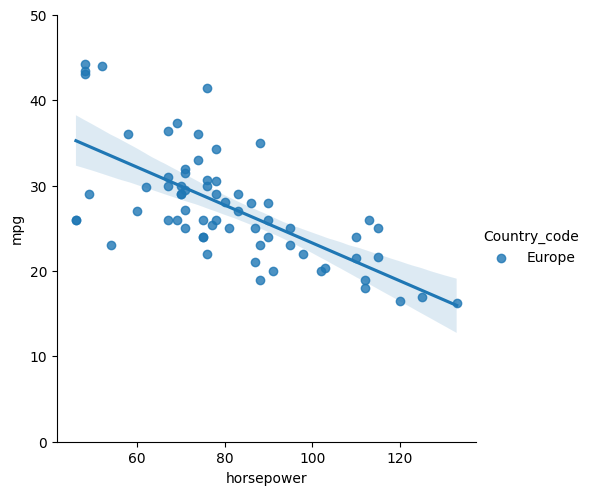

In [76]:
df_usa = df[df['Country_code'] == 'USA']
df_japan = df[df['Country_code'] == 'Japan']
df_europe = df[df['Country_code'] == 'Europe']

var = 'horsepower'
plot = sns.lmplot(x=var,y='mpg',data=df_usa,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_japan,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_europe,hue='Country_code')
plot.set(ylim = (0,50))

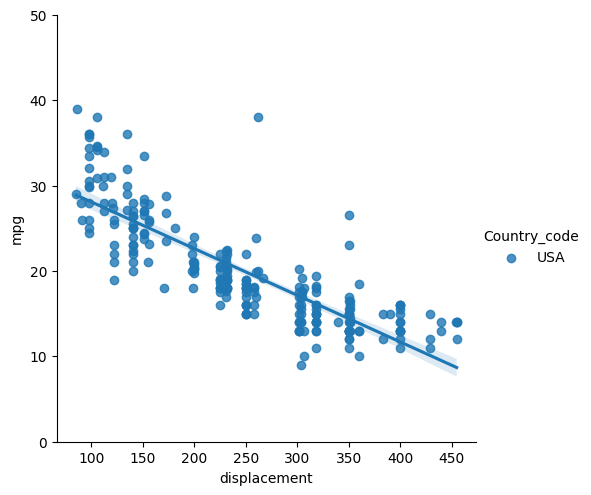

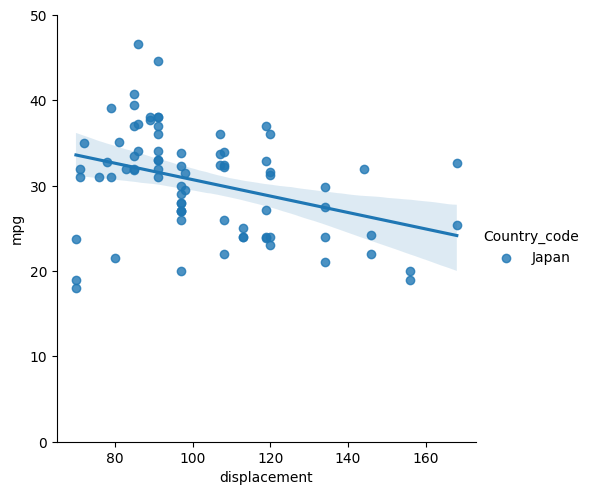

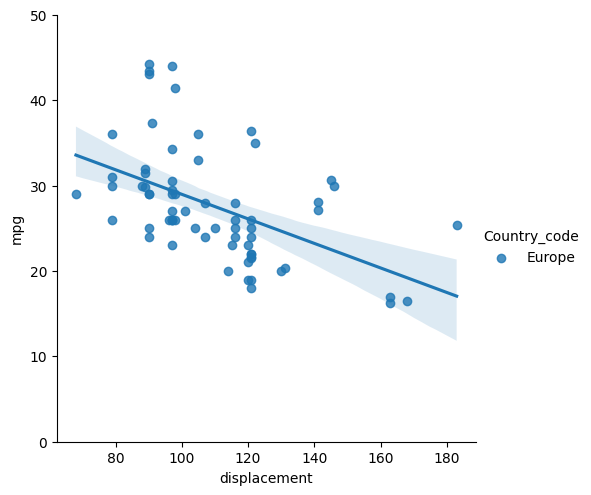

In [77]:
var = 'displacement'
plot = sns.lmplot(x=var,y='mpg',data=df_usa,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_japan,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_europe,hue='Country_code')
plot.set(ylim = (0,50))

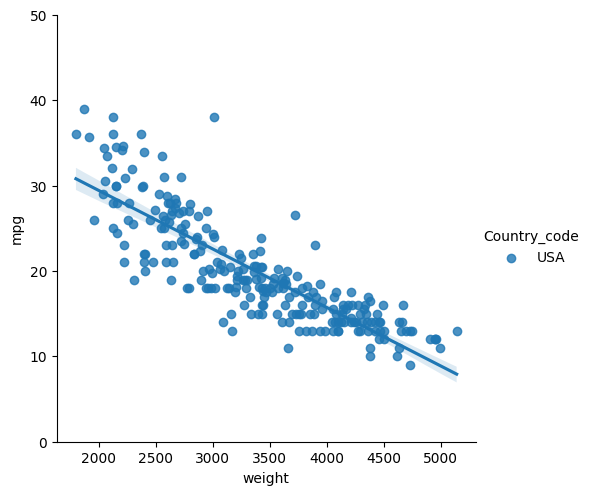

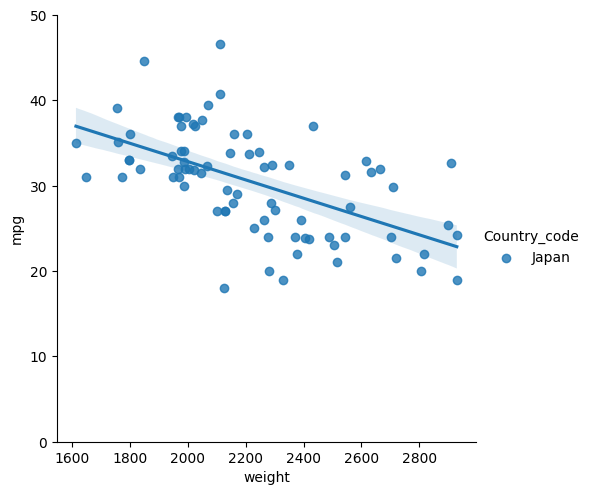

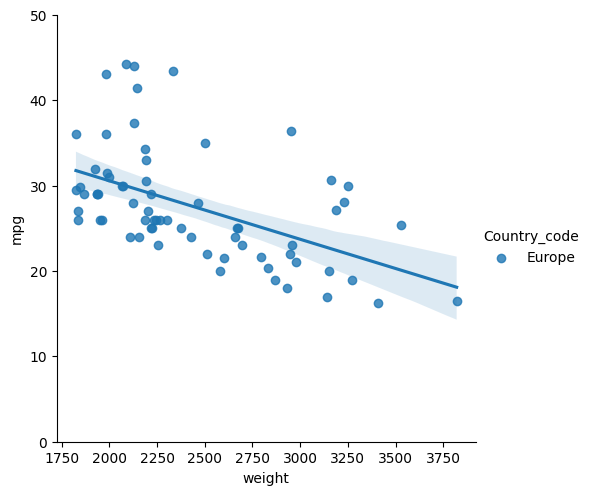

In [78]:
var = 'weight'
plot = sns.lmplot(x=var,y='mpg',data=df_usa,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_japan,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_europe,hue='Country_code')
plot.set(ylim = (0,50))

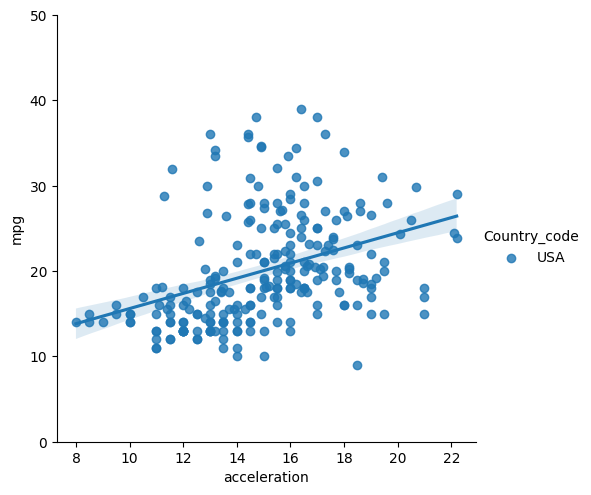

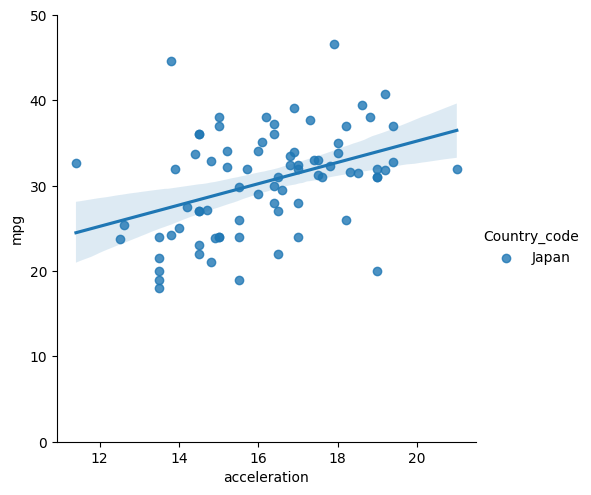

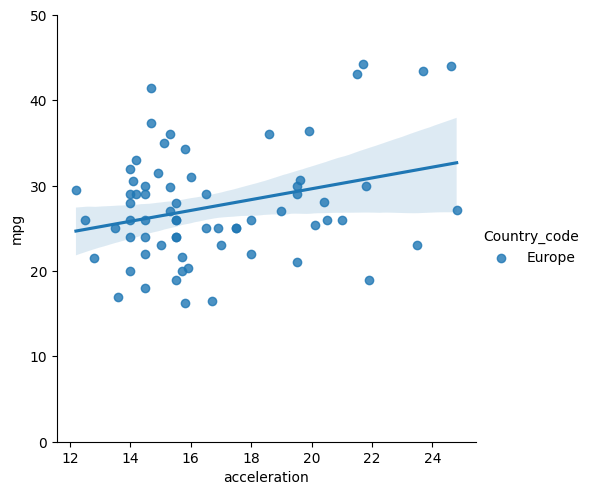

In [80]:
var = 'acceleration'
plot = sns.lmplot(x=var,y='mpg',data=df_usa,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_japan,hue='Country_code')
plot.set(ylim = (0,50))
plot = sns.lmplot(x=var,y='mpg',data=df_europe,hue='Country_code')
plot.set(ylim = (0,50))

### Vamos adicionar uma nova coluna para o nosso dataset usando informações que já temos para ter mais insights. (apenas uma tentativa)

Vamos adicionar a coluna power_to_weight, ou seja, vamos transformar os cavalos em kW: 1Hp = 0.7457 kW e dividir pelo peso.

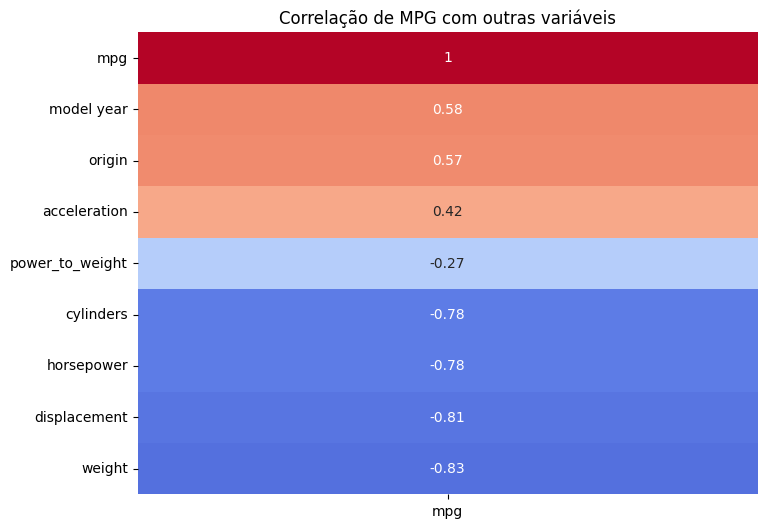

In [91]:
df['power_to_weight'] = ((df['horsepower']*0.7457)/df['weight'])
df.sort_values(by='power_to_weight',ascending=False ).head()

df_heatmap = df.select_dtypes(include='number')
corr_matrix = df_heatmap.corr()
corr_var = corr_matrix[['mpg']].sort_values(by='mpg', ascending=False)

# Plotando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_var, annot=True, cmap='coolwarm', cbar=False, vmin=-1, vmax=1)

plt.title('Correlação de MPG com outras variáveis')
plt.show()

### Foi possivel observar que a variável que criamos não possui tanta relação assim com o gasto de combustível.

### Depois de toda essa análise, vamos começar a treinar um modelo para nos falar a quantidade de milhas por galão um carro X faria.

Para isso iremos testar:
- Regressão linear
- Regressão GMB (Gradient Boosting Machine)

In [242]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [243]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year'] #definindo o que é dados de entrada
X = pd.DataFrame(df[factors].copy())
y = df['mpg'].copy() #definindo qual vai ser o dado de saída

### Separar os dados

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=300) #dividindo os valores entre treino e teste de forma "randomica"
X_train.shape[0] == y_train.shape[0]

True

### Criando e treinando um modelo de *Regressão Linear*

In [245]:
regressor = LinearRegression() #cria um modelo de regressão linear
regressor.fit(X_train,y_train) #treinando o modelo

LinearRegression()

### Testando o modelo

In [246]:
y_predicted = regressor.predict(X_test) #predição dos dados separados para teste
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted)) #calculando rmse, uma métrica para saber se o modelo funciona bem

print(f'rmse: {rmse}')

rmse: 3.289725123809247


### Criando e treinando um modelo de *GBM*

In [247]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=4000)

### Testando o modelo

In [248]:
y_predicted_gbr = gb_regressor.predict(X_test)
rmse_gbr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))

print(f'rmse: {rmse_gbr}')


rmse: 2.94387629367604


<Axes: >

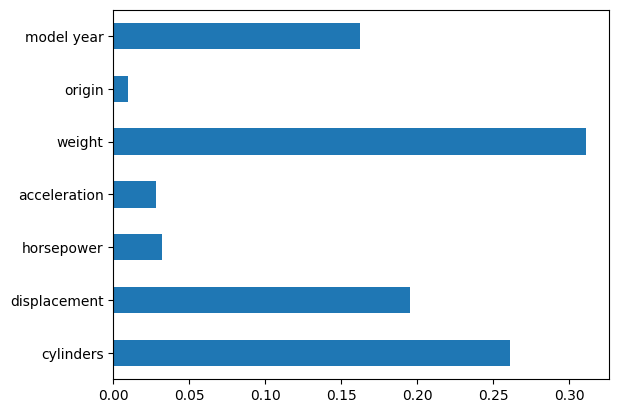

In [249]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

### Testando em um carro que não está presente no dataset

In [250]:
#informações sobre o dodge challenger 1971

carro = pd.DataFrame({
    'cylinders': [6.0],
    'displacement': [225.0],
    'horsepower': [155.0],
    'acceleration': [11.0],
    'weight': [3300.0],
    'origin': [1],
    'model year': [71]
})

mpg_carro = gb_regressor.predict(carro)

print(mpg_carro)

[20.38497918]
